+ 欠拟合：机器学习模型无法得到较低的训练误差
+ 过拟合：机器学习模型的训练误差远小于其在测试数据集上的误差

多项式欠拟合：
$$\hat{y} = b + \sum_{k=1}^K x^k w_k$$

#### 创建数据集

使用如下公式创建数据样本：
$$y = 1.2x - 3.4x^2 +5.6x^3 + 5.0 + noise$$

In [1]:
from mxnet import ndarray as nd
from mxnet import autograd
from mxnet import gluon

num_train = 100
num_test = 100
true_w = [1.2, -3.4, 5.6]
true_b = 5.0

In [5]:
#生成对应数据集
x = nd.random.normal(shape=(num_train + num_test, 1))
X = nd.concat(x, nd.power(x, 2), nd.power(x, 3))
y = true_w[0] * X[:, 0] + true_w[1] * X[:, 1] + true_w[2] * X[:, 2] + true_b
y += .1 * nd.random.normal(shape=y.shape)

('x:', x[:5], 'X:', X[:5], 'y:', y[:5])

('x:', 
 [[-0.64744008]
  [-0.55203336]
  [ 0.10064353]
  [-0.33182386]
  [ 0.49453422]]
 <NDArray 5x1 @cpu(0)>, 'X:', 
 [[-0.64744008  0.41917866 -0.27139306]
  [-0.55203336  0.30474085 -0.16822711]
  [ 0.10064353  0.01012912  0.00101943]
  [-0.33182386  0.11010707 -0.03653615]
  [ 0.49453422  0.2445641   0.12094532]]
 <NDArray 5x3 @cpu(0)>, 'y:', 
 [ 1.17102313  2.493016    5.16932201  3.98604369  5.42537785]
 <NDArray 5 @cpu(0)>)

定义训练和测试步骤

In [8]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
import matplotlib.pyplot as plt

def train (X_train, X_test, y_train, y_test):
    #线性回归模型
    net = gluon.nn.Sequential()
    with net.name_scope():
        net.add(gluon.nn.Dense(1))
    net.initialize()
    #设置一些参数
    learning_rate = 0.01
    epochs = 100
    batch_size = min(10, y_train.shape[0])
    dataset_train = gluon.data.ArrayDataset(X_train, y_train)
    data_iter_train = gluon.data.DataLoader(dataset_train, batch_size, shuffle=True)
    #梯度下降
    trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': learning_rate})
    #损失函数 均方误差
    squaer_loss = gluon.loss.L2Loss()
    #保存训练结果和测试损失
    train_loss = []
    test_loss = []
    
    for e in range(epochs):
        for data, label in data_iter_train:
            with autograd.record():
                output = net(data)
                loss = squaer_loss(output, label)
            loss.backward()
            trainer.step(batch_size)
        train_loss.append(squaer_loss(net(X_train), y_train).mean().asscalar())
        test_loss.append(squaer_loss(net(X_test), y_test).mean().asscalar())
    
    #打印结果
    plt.plot(train_loss)
    plt.plot(test_loss)
    plt.legend('train', 'test')
    plt.show()
    return ('learned weight', net[0].weight.data(),
           'learned bias', net[0].bias.data())

/usr/lib/python3/dist-packages/matplotlib/legend.py:633: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/usr/lib/python3/dist-packages/matplotlib/legend.py:633: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/usr/lib/python3/dist-packages/matplotlib/legend.py:633: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/usr/lib/python3/dist-packages/matplotlib/legend.py:633: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#usin

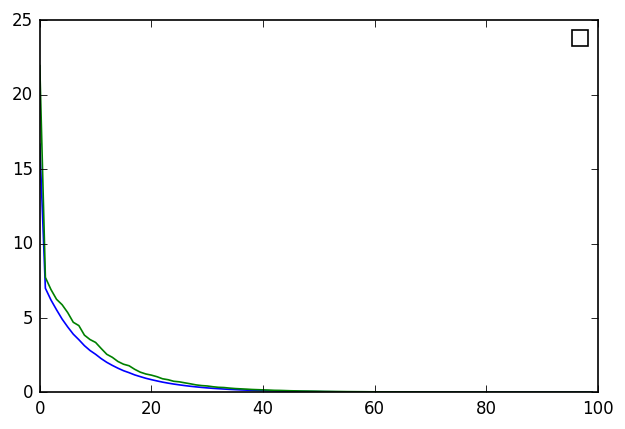

('learned weight', 
 [[ 1.13509595 -3.380481    5.61624956]]
 <NDArray 1x3 @cpu(0)>, 'learned bias', 
 [ 4.96317148]
 <NDArray 1 @cpu(0)>)

In [10]:
# 正常情况下的训练
train(X[:num_train, :], X[num_train:, :], y[:num_train], y[num_train:])

/usr/lib/python3/dist-packages/matplotlib/legend.py:633: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/usr/lib/python3/dist-packages/matplotlib/legend.py:633: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/usr/lib/python3/dist-packages/matplotlib/legend.py:633: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/usr/lib/python3/dist-packages/matplotlib/legend.py:633: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#usin

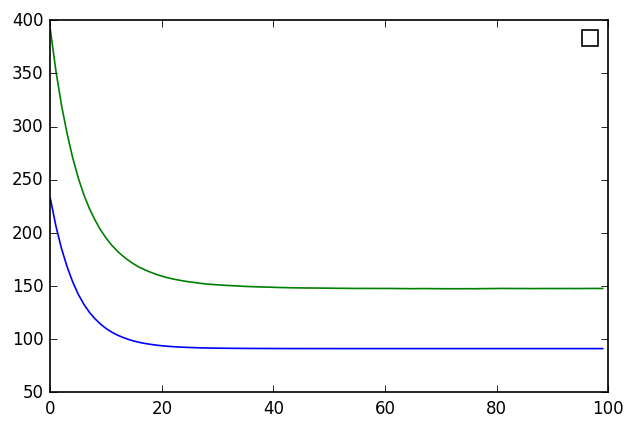

('learned weight', 
 [[ 18.59710884]]
 <NDArray 1x1 @cpu(0)>, 'learned bias', 
 [ 1.0616194]
 <NDArray 1 @cpu(0)>)

In [11]:
#欠拟合的情况
train(x[:num_train, :], x[num_train:, :], y[:num_train], y[num_train:])

/usr/lib/python3/dist-packages/matplotlib/legend.py:633: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/usr/lib/python3/dist-packages/matplotlib/legend.py:633: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/usr/lib/python3/dist-packages/matplotlib/legend.py:633: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/usr/lib/python3/dist-packages/matplotlib/legend.py:633: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#usin

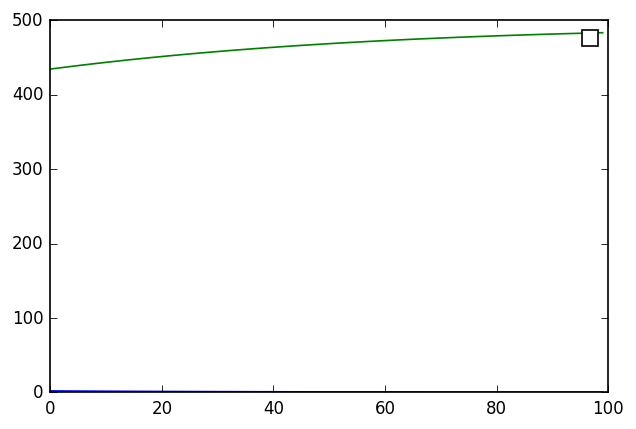

('learned weight', 
 [[-0.50036943  0.29591447 -0.14659129]]
 <NDArray 1x3 @cpu(0)>, 'learned bias', 
 [ 0.97332984]
 <NDArray 1 @cpu(0)>)

In [12]:
# 过拟合
train(X[0:2, :], X[num_train:, :], y[0:2], y[num_train:])